# Task 1 (5% credit) 
Provide a definition for the concept of a conjugate prior given the Bayesian learning model. What is the conjugate prior for the univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a fixed $\sigma$?

A class of prior distributions in called conjugate with respect to a Bayesian learning model if for each prior of the considered class, the corresponding posterior will also belong to this class. This way the conjugate prior for the univariate linear regression with a fixed $\sigma$ is a normal distribution.


# Task 2 (5% credit). 
Which prior in the Bayesian linear regression framework leads to: a) Ridge regression, b) Lasso regression?


a) Normal prior $w_j\sim{\cal N}(0,\sigma/\sqrt{\lambda})$, 

b) Laplacian prior $p(w_j)\sim e^{-\lambda|w_j|/\sigma}$.



# Task 3 (10% credit). 
Answer some questions about the properties of Lasso/Ridge:

a) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?

Ridge does:
$$
\hat{w}=(X^T X+\lambda I)^{-1}X^T Y, 
$$
while Lasso does not.


b) Which of the Lasso and Ridge regressions often use to completely eliminate coefficients for some of the regressors?

Lasso.

c) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

$\lambda=0$

d) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

Validation set

# Task 4 (15% credit). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=1$ and the prior $w\sim {\cal N}(5,1)$. Compute the posterior distribution after an observation $y=12,x=2$. After all, what is the probability of having $w<5$?

The posterior will take form:
$$
\hat{w}\sim {\cal N}\left(\frac{ \sigma^{-2} \sum_i y_i x_i +(\sigma^*)^{-2} w^*}{\left(\sum_i x_i^2\sigma^{-2}+(\sigma^*)^{-2}\right)},
\frac{1}{\sqrt{(\sigma^*)^{-2}+\sum_i x_i^2\sigma^{-2}}}\right)={\cal N}\left(\frac{1\cdot 12\cdot 2 +1\cdot 5}{\left(1\cdot 2^2 +1\right)},
\frac{1}{\sqrt{1+2^2}}\right)={\cal N}\left(5.8,
\frac{1}{\sqrt{5}}\right).
$$

Then the probability of having $w<5$ will be the value of the cumulative distribution function of the normal distribution 

In [4]:
import scipy.stats as stats
stats.norm.cdf(5, loc=5.8, scale=1/5**0.5)
print "i.e 3.68%"

i.e 3.68%


# Task 5 (20% credit). 
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [5]:
import os
import numpy as np
import pandas as pd
import random
import re
%matplotlib inline
import statsmodels.formula.api as sm
from pandas.stats.api import ols
import pylab
import matplotlib.pyplot as plt
from sklearn import linear_model
#Change graph size
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 10 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size    
import math


In [7]:
data_train=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session2/HW/Homework1_training.csv")
y_train=np.asarray(data_train.iloc[:,-1]) # make dependent variable
X_train=np.asarray(data_train.iloc[:,1:-2]) #make independent variables

data_test=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session2/HW/Homework1_test.csv")
y_test=np.asarray(data_test.iloc[:,-1]) # make dependent variable
X_test=np.asarray(data_test.iloc[:,1:-2]) #make independent variables


In [8]:
#OLS
# In the sample. (Only use training set)
result=ols(y=y_train,x=pd.DataFrame(X_train),intercept=False)
R_2_IS=result.r2  # get R2
OLS_coef=result.beta
print("The R-squared we found for IS OLS is: {0}".format(R_2_IS))

#Out of sample 
a=np.array(X_test)  #make sure to convert pd data to np array
b=np.array(result.beta) #makes sure  to conver pd data to np array
c=np.sum(a*b,axis=1) #b is estimated coefficients, a is test data, b[-1] is intercept(we don't have). This is for predicted y
error=y_test-c # y_test is real value, c is the value we guessed
R_2_OS=1-error.var()/y_test.var() # this is out of sample R2
print("The R-squared we found for OS OLS is: {0}".format(R_2_OS))


The R-squared we found for IS OLS is: 0.999999908005
The R-squared we found for OS OLS is: -2.39586070528


# Task 6 (20% credit). 
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ and report their performance over the test set.

In [10]:
# For Ridge fit_intercept=False (if you do not set intercept=False, the answer should be similar.)
Ridge=linear_model.Ridge(fit_intercept=False,alpha=40000) 
Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge(if we set intercept=False)  is\n: {0}".format(R_2_IS_Ridge))
Ridge_coef=Ridge.coef_
############################################################################        
#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge(if we set intercept=False)  is:\n {0}".format(R_2_OS_Ridge))


The R-squared we found for IS Ridge(if we set intercept=False)  is
: 0.846360797693
The R-squared we found for OS Ridge(if we set intercept=False)  is:
 0.672787708143


In [11]:
#For Lasso fit_intercept=False
Lasso=linear_model.Lasso(fit_intercept=False, alpha=40,max_iter=10000000)
Lasso.fit(X_train,y_train)
#In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso(If we set intercept= False) is:\n {0}".format(R_2_IS_Lasso))
Lasso_coef=Lasso.coef_
#Out of sample:
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso(if we set intercept=False) is:\n {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso(If we set intercept= False) is:
 0.865603688659
The R-squared we found for OS Lasso(if we set intercept=False) is:
 0.652411961725


# Task 7 (25% credit). 
For each $m=1,2,...39$ train OLS, Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ using the first $m$ columns of the data tables as the regressors and plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.

D:\Users\ling\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


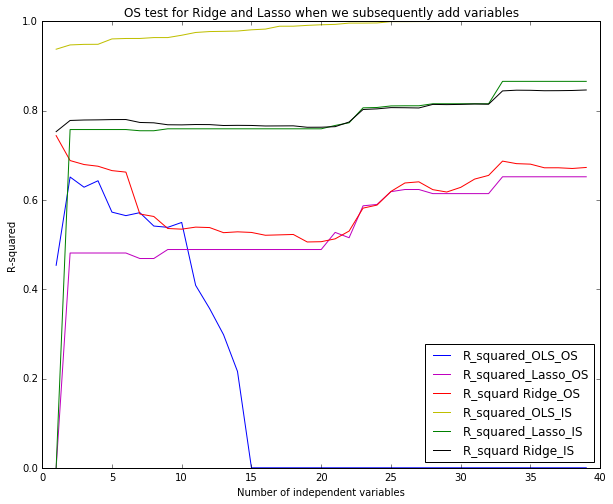

In [9]:
# set intercepts = False (if you add the itercepts,the solutions should be similar)
#make lists to save R2
Number_variables=[]
OLS_R_2_Ridge_OS_F=[]
OLS_R_2_Ridge_IS_F=[]

OLS_R_2_Lasso_OS_F=[]
OLS_R_2_Lasso_IS_F=[]

OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]

t=0

##########################################################################################################
##########################################################################################################

for j in range(len(X_train.T)): #subsequently add variables
    
    t+=1
    Number_variables.append(t)
    
    X=X_train[:,0:j+1]
    y=y_train

# Then we just repeat the process to calculate the R2 as we did before.
##############################################################################    
##############################################################################    
#For Ridge
    
    Ridge=linear_model.Ridge(fit_intercept=False,alpha=40000)
    Ridge.fit(X,y)
    
    # In the sample:
    p_IS=Ridge.predict(X)
    err_IS=p_IS-y
    R_2_IS=1-np.var(err_IS)/np.var(y)
    OLS_R_2_Ridge_IS_F.append(R_2_IS)
############################################################################    
    
    #Out of sample
    p_OS=Ridge.predict(X_test[:,0:j+1])
    err_OS=p_OS-y_test
    R_2_OS=1-np.var(err_OS)/np.var(y_test)
    
    if R_2_OS>0:
        OLS_R_2_Ridge_OS_F.append(R_2_OS)
    else:
        OLS_R_2_Ridge_OS_F.append(0)
        
    
############################################################################    
############################################################################
#For Lasso
    Lasso=linear_model.Lasso(fit_intercept=False, alpha=40)
    Lasso.fit(X,y)
    
    #In the sample:
    p_IS=Lasso.predict(X)
    err_IS=p_IS-y
    R_2_IS=1-np.var(err_IS)/np.var(y)
    if R_2_IS>0:
        OLS_R_2_Lasso_IS_F.append(R_2_IS)
    else:
        OLS_R_2_Lasso_IS_F.append(0)
############################################################################    

    #Out of sample
    p_OS=Lasso.predict(X_test[:,0:j+1])
    err_OS=p_OS-y_test
    R_2_OS=1-np.var(err_OS)/np.var(y_test)
    if R_2_OS>0:
        OLS_R_2_Lasso_OS_F.append(R_2_OS)
    else:
        OLS_R_2_Lasso_OS_F.append(0)

   
 ############################################################################
############################################################################
#OLS Out of Sample
#OLS
# In the sample. (Only use training set)
    result=ols(y=y_train,x=pd.DataFrame(X_train[:,0:j+1]),intercept=False)
    R_2_IS=result.r2  # get R2

    #Out of sample 
    a=np.array(X_test[:,0:j+1])  
    b=np.array(result.beta) 
    c=np.sum(a*b,axis=1) #we do not add intercept here. c is predicted y. 
    error=y_test-c # y_test is real value, c is the value we predicted for y.
    R_2_OS=1-error.var()/y_test.var() # this is out of sample R2
    if R_2_OS>0:
        OLS_R_2_OS_F.append(R_2_OS)
    else:
        OLS_R_2_OS_F.append(0)
############################################################################
    #OLS In the sample:
    OLS_R_2_IS_F.append(result.r2)
############################################################################
############################################################################
# Plot the required six lines
pylab.title('OS test for Ridge and Lasso when we subsequently add variables')
pylab.plot(Number_variables,OLS_R_2_OS_F,'b',label='R_squared_OLS_OS')
pylab.plot(Number_variables,OLS_R_2_Lasso_OS_F,'m',label='R_squared_Lasso_OS')
pylab.plot(Number_variables,OLS_R_2_Ridge_OS_F,'r',label='R_squard Ridge_OS')

pylab.plot(Number_variables,OLS_R_2_IS_F,'y',label='R_squared_OLS_IS')
pylab.plot(Number_variables,OLS_R_2_Lasso_IS_F,'g',label='R_squared_Lasso_IS')
pylab.plot(Number_variables,OLS_R_2_Ridge_IS_F,'k',label='R_squard Ridge_IS')


pylab.legend(loc='lower right')
pylab.xlabel('Number of independent variables')
pylab.ylabel('R-squared')
pylab.show()

# Extracredit (25% of credit to be applied towards this or any other homework)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 60% training and 40% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression: for each $\lambda$ of the considered sequence compute an average validation R2 for the 10 splits considered and finally select the $\lambda$ having the highest value for this average R2. Visualize the dependence of the said average cross-validation R2 over $\lambda$ for Lasso and Ridge. Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$.

In [10]:
# Set intercept = False
Ridge_R_2_OS=[]
Lasso_R_2_OS=[]


alpha = np.linspace(-20,20,200)
alpha_r=[math.exp(i) for i in alpha]
alpha = np.linspace(-20,20,200)
alpha_l=[math.exp(i) for i in alpha]


for a in alpha_r:
    
    R2_experiment_ridge=[]
    R2_experiment_lasso=[] 
    
    for i in range(10):

        # Divide the training set into validation set and training set

        train_index_new=random.sample(list(range(len(X_train))),int(len(X_train)*0.6)) #choose some rows as train_index_new   
        validation_index=[x for x in list(range(len(X_train))) if x not in train_index_new] # Use the rest of rows as our validation rows.


        X_validation=X[validation_index,:]
        y_validation=y[validation_index]

        X_train_new=X[train_index_new,:]
        y_train_new=y[train_index_new]


    #Ridge 

        Ridge=linear_model.Ridge(fit_intercept=False, alpha=a)
        Ridge.fit(X_train_new,y_train_new)

        p_OS=Ridge.predict(X_validation) #since we use Out of Sample methods. We need to put X_validation here
        err_OS=p_OS-y_validation
        R_2_OS=1-np.var(err_OS)/np.var(y_validation)
        R2_experiment_ridge.append(R_2_OS)

    ##############################################################################
    #Lasso
        Lasso=linear_model.Lasso(fit_intercept=False, alpha=a,)
        Lasso.fit(X_train_new,y_train_new)
        
        p_OS=Lasso.predict(X_validation) #since we use Out of Sample methods. We need to put X_validation here
        err_OS=p_OS-y_validation
        R_2_OS=1-np.var(err_OS)/np.var(y_validation)
        R2_experiment_lasso.append(R_2_OS)
    
    Ridge_R_2_OS.append(np.average(R2_experiment_ridge))
    Lasso_R_2_OS.append(np.average(R2_experiment_lasso))
    
temp=np.concatenate(([np.asarray(Ridge_R_2_OS)],[alpha_r]),axis=0)
for i in range(len(temp.T)):
    if temp[0,i]==np.amax(temp[0,:]):
        lam_ridge=temp[1,i]
print("the lambda for Ridge is:{}".format(lam_ridge))
    
temp=np.concatenate(([np.asarray(Lasso_R_2_OS)],[alpha_l]),axis=0)
for i in range(len(temp.T)):
    if temp[0,i]==np.amax(temp[0,:]):
        lam_lasso=temp[1,i]
print("the lambda for Lasso is:{}".format(lam_lasso))    
    
    
     


the lambda for Ridge is:25610.3992541
the lambda for Lasso is:307.551703963
